# **Proyecto 2 - Entrega 1: Modelos de Regresión Lineal**  

## 👥 **Integrantes:**  
- **Diederich Solis** (22952)  
- **Gabriel Paz** (221087)  

---

##  **INSTRUCCIONES**  
Utilice el data set House Prices: Advanced Regression Techniques. Debe hacer un análisis exploratorio para entender mejor los datos, sabiendo que el objetivo final es predecir los precios de las casas. Recuerde explicar bien cada uno de los hallazgos que haga. La forma más organizada de hacer un análisis exploratorio es generando ciertas preguntas de las líneas que le parece interesante investigar. Genere un informe con las explicaciones de los
pasos que llevó a cabo y los resultados obtenidos. Recuerde que la investigación debe ser reproducible por lo que debe guardar el código que ha utilizado para resolver los ejercicios.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('train.csv')

df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Ahora observaremos la data con la que contamos:

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Revisión Inicial de Datos

- **Dimensiones del dataset:**  
  El conjunto de datos consta de 1460 registros y 81 columnas, lo que nos permite trabajar con una cantidad moderada de observaciones y múltiples atributos para analizar.

- **Tipos de variables:**  
  Se observa una mezcla de variables numéricas y categóricas. Esto indica que el dataset incluye datos cuantitativos (como áreas, precios y medidas) y cualitativos (como vecindarios, tipos de calle y materiales de construcción).

- **Presencia de valores nulos:**  
  Algunas columnas presentan valores faltantes, lo cual es común en datasets reales. En particular, variables como `PoolQC`, `MiscFeature` y `Alley` tienen un alto porcentaje de datos ausentes. Es necesario identificar la causa de estas ausencias y decidir si se imputan o se eliminan estas columnas, según su relevancia en el modelo.

- **Variables categóricas:**  
  Las columnas de tipo categórico representan atributos descriptivos importantes, tales como el vecindario, el tipo de calle, y los materiales de construcción. Estos atributos pueden ser fundamentales para capturar diferencias en la calidad y el valor de las propiedades, por lo que su correcta codificación e interpretación es esencial para construir modelos de regresión robustos.


In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


##  **Análisis Descriptivo de los Datos**  

El análisis descriptivo nos permite explorar las distribuciones y características de las variables numéricas clave en el dataset.  

###  **Distribución de Variables Numéricas**  
Algunas variables presentan una amplia dispersión en sus valores, lo que indica una gran variabilidad en las características de las propiedades:  

- ** Tamaño del lote (`LotArea`)**:  
  - Representa el área total del terreno de cada vivienda.  
  - Tiene un amplio rango de valores, lo que sugiere que las propiedades varían significativamente en tamaño.  

- ** Área habitable sobre nivel del suelo (`GrLivArea`)**:  
  - Indica el espacio habitable de la casa (excluyendo sótanos).  
  - Presenta una distribución sesgada hacia la derecha, con algunas viviendas mucho más grandes que el promedio.  

- ** Precio de venta (`SalePrice`)**:  
  - **Valor mínimo:** 34,900  
  - **Valor máximo:** 755,000  
  - **Distribución:** Asimétrica, con la mayoría de los precios concentrados en rangos más bajos y algunas propiedades muy costosas actuando como valores atípicos.  

###  **Variables con Valores Mayoritariamente Cero**  
Algunas variables contienen valores de **cero en la mayoría de los registros**, lo que indica que la característica correspondiente es poco común en el dataset:  

- ** `PoolArea` (Área de piscina):**  
  - La mayoría de las viviendas no tienen piscina, lo que sugiere que esta variable tiene poco impacto en la predicción de precios.  

Este análisis nos permite identificar posibles **valores atípicos**, entender la distribución de las variables y evaluar cuáles podrían requerir transformaciones para mejorar el rendimiento de los modelos de regresión.  



In [4]:
df.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

## Análisis de Valores Nulos  

Uno de los pasos fundamentales en la limpieza de datos es identificar y manejar los valores nulos, ya que pueden afectar la precisión y el rendimiento de los modelos de regresión.  

### Variables con Alto Porcentaje de Valores Nulos  
Algunas columnas contienen más del 50% de valores faltantes, lo que indica que tienen muy poca información relevante. Entre ellas se encuentran:  

- **PoolQC (Calidad de la piscina)**  
  - Más del 99% de los valores están ausentes.  
  - La mayoría de las viviendas no tienen piscina, por lo que esta variable aporta poco a la predicción del precio.  

- **MiscFeature (Características misceláneas como cobertizos o ascensores)**  
  - Más del 96% de los valores son nulos.  
  - Representa características poco comunes que probablemente no tengan un gran impacto en el precio de la vivienda.  

- **Alley (Tipo de acceso trasero o callejón)**  
  - Más del 93% de los valores están ausentes.  
  - Muchas viviendas no tienen acceso trasero a un callejón, lo que explica la alta cantidad de valores nulos.  

### Variables Numéricas con Algunos Valores Nulos  
Existen algunas variables numéricas importantes con valores faltantes que deben ser tratados adecuadamente:  

- **MasVnrArea (Área de revestimiento de mampostería)**  
  - Algunos valores nulos indican que la vivienda no tiene revestimiento de mampostería.  
  - Se puede imputar con cero en estos casos.  

- **GarageYrBlt (Año de construcción del garaje)**  
  - Algunas casas no tienen garaje, lo que explica los valores faltantes.  
  - Se puede reemplazar con "0" o con el año de construcción de la vivienda.  


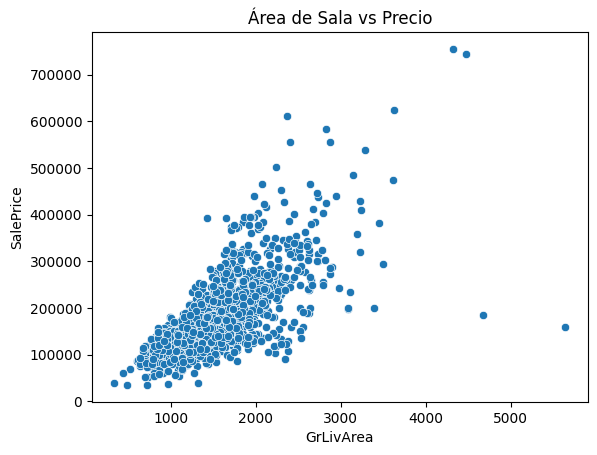

In [5]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('Área de Sala vs Precio')
plt.show()

## Relación entre Área Habitable y Precio (GrLivArea vs SalePrice)  

Se observa una relación positiva entre el área habitable (`GrLivArea`) y el precio de venta (`SalePrice`): a mayor área, mayor precio.  

Sin embargo, existen algunos valores atípicos, principalmente casas muy grandes con precios anormalmente bajos. Estos outliers pueden afectar el rendimiento del modelo, por lo que se recomienda analizarlos y considerar su eliminación.  


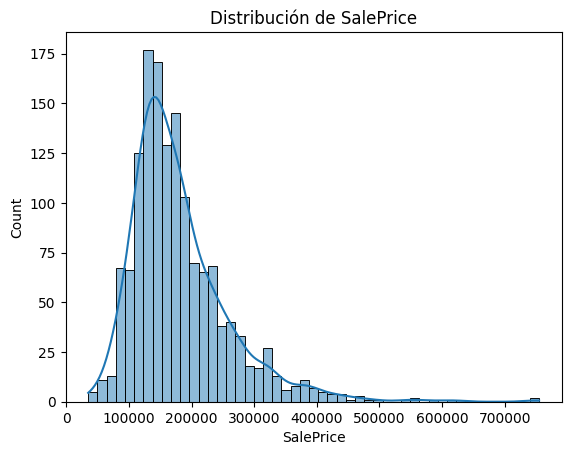

In [6]:
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribución de SalePrice')
plt.show()

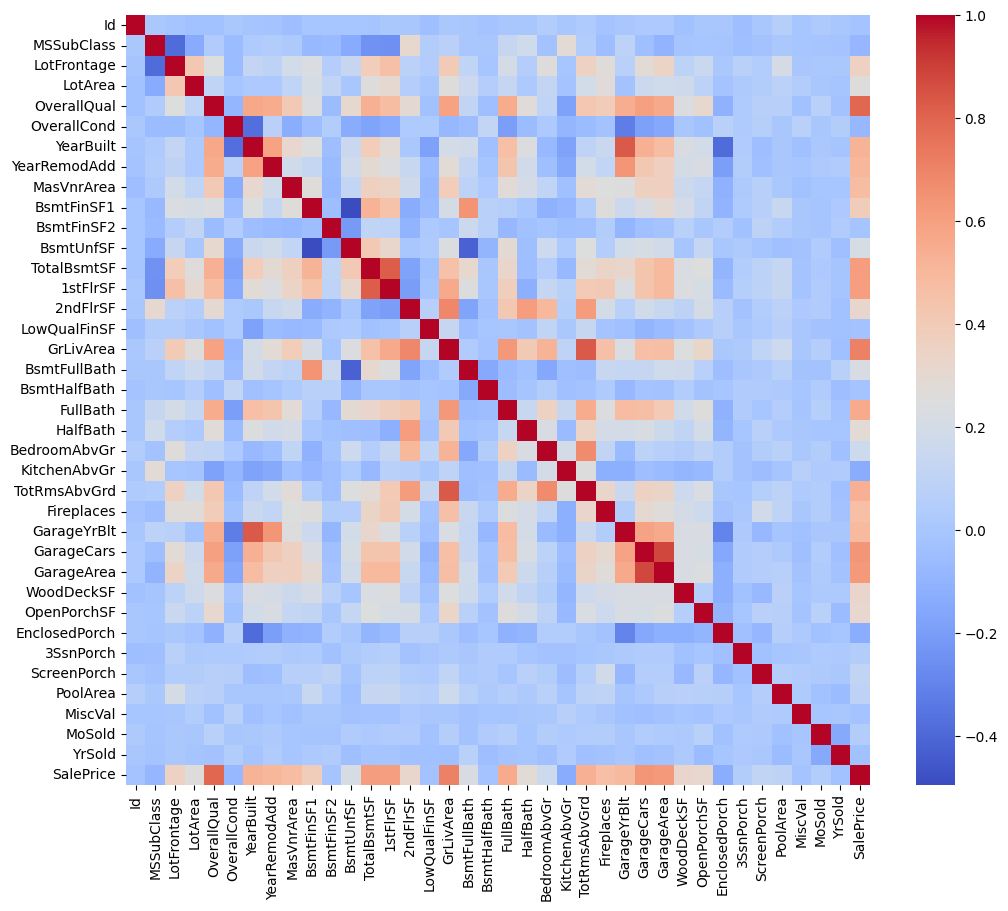

In [7]:

df_numeric = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()


## Matriz de Correlación  

Las variables con mayor correlación con el precio de venta (`SalePrice`) son:  
- **OverallQual** (calidad general de la vivienda)  
- **GrLivArea** (área habitable sobre el nivel del suelo)  
- **GarageCars** (cantidad de autos que caben en el garaje)  

Por otro lado, variables como `PoolArea`, `MiscVal` y `3SsnPorch` tienen una correlación cercana a cero, lo que indica que no son relevantes para predecir el precio.  

Este análisis es clave para la selección de variables, permitiendo enfocarse en aquellas que realmente impactan en el modelo de regresión.  


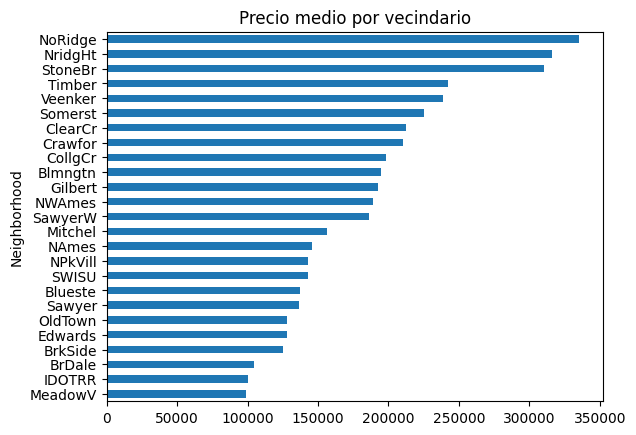

In [8]:
df.groupby('Neighborhood')['SalePrice'].mean().sort_values().plot(kind='barh')
plt.title('Precio medio por vecindario')
plt.show()

## Precio Promedio por Vecindario  

Existe una clara diferencia de precios según la ubicación de la vivienda.  

- **Vecindarios con precios más altos:** `NoRidge`, `StoneBr`  
- **Vecindarios más económicos:** `MeadowV`  

Esto confirma que `Neighborhood` es una variable clave en la predicción del precio de venta. En el preprocesamiento, se recomienda convertir esta variable en **dummies** para su uso en el modelo de regresión.  


c:\Users\DELL I7\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


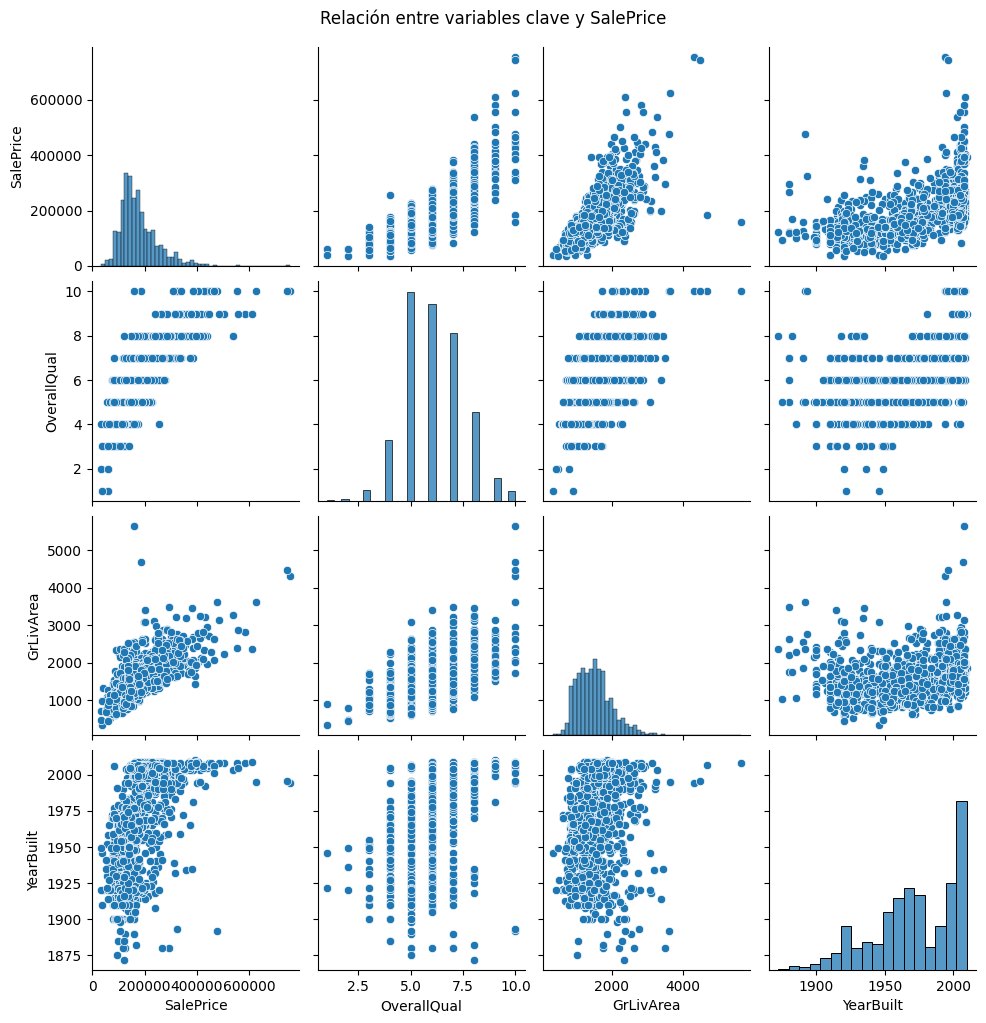

In [9]:
sns.pairplot(df, vars=['SalePrice', 'OverallQual', 'GrLivArea', 'YearBuilt'])
plt.suptitle('Relación entre variables clave y SalePrice', y=1.02)
plt.show()


## Pairplot: Relación entre Variables Clave y SalePrice  

Se observa una relación positiva entre `SalePrice` y las siguientes variables:  

- **OverallQual:** A mayor calidad general de la vivienda, mayor es el precio.  
- **GrLivArea:** Casas con mayor área habitable tienden a tener precios más altos.  
- **YearBuilt:** Las casas más nuevas suelen ser más costosas.  

Además, hay algunos outliers, especialmente viviendas muy grandes con precios anormalmente bajos, que podrían afectar el modelo y deben ser analizados.  


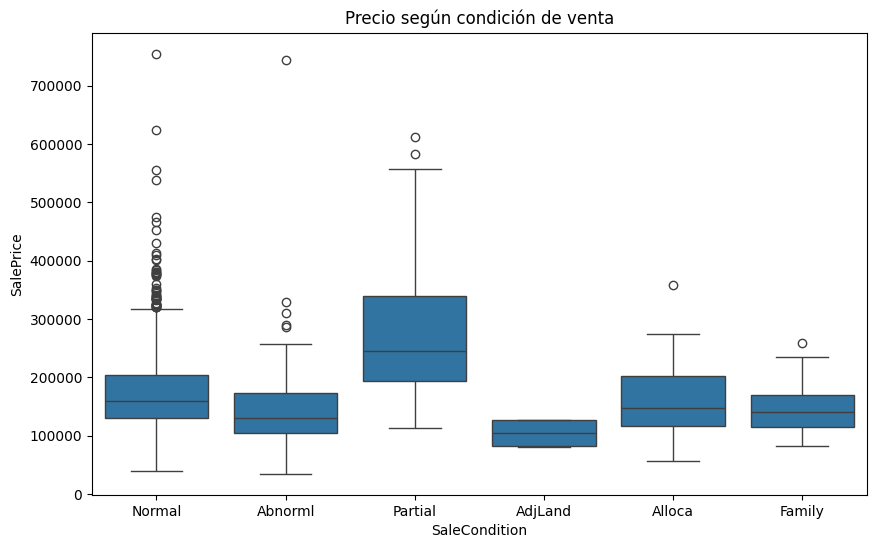

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x='SaleCondition', y='SalePrice', data=df)
plt.title('Precio según condición de venta')
plt.show()

## Boxplot: Precio según Condición de Venta  

El análisis muestra diferencias en la distribución de precios según la condición de venta (`SaleCondition`):  

- **Normal:** Presenta una distribución de precios más estable y amplia.  
- **Partial:** Tiende a tener precios más altos, posiblemente porque corresponde a casas nuevas o remodeladas.  
- **Abnorml:** Generalmente muestra precios más bajos, lo que podría estar relacionado con ventas forzadas o condiciones especiales.  

Se identifican varios outliers en cada categoría, especialmente en `Normal` y `Partial`, lo que sugiere la necesidad de revisar su impacto en el modelo.  


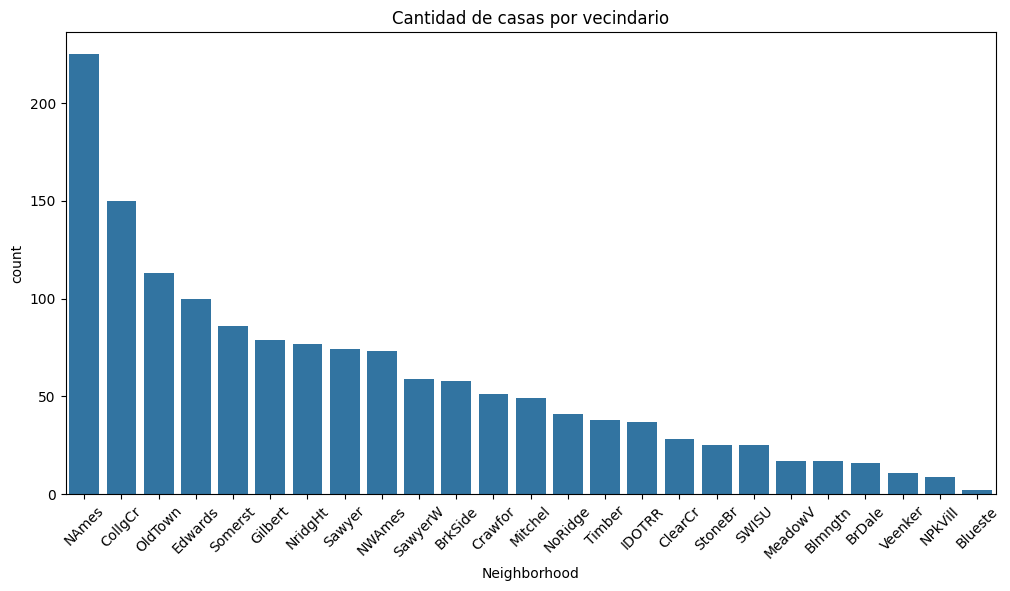

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(x='Neighborhood', data=df, order=df['Neighborhood'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Cantidad de casas por vecindario')
plt.show()


## Countplot: Cantidad de Casas por Vecindario  

El número de viviendas varía significativamente entre vecindarios:  

- **NAmes** es el vecindario con más casas registradas, seguido por **CollgCr** y **OldTown**.  
- **MeadowV** y **Blueste** tienen muy pocas viviendas en el dataset.  

Esto sugiere que algunos vecindarios aportan mucha más información al modelo que otros. En el preprocesamiento, se debe evaluar si los vecindarios con pocas casas son relevantes o si es conveniente agruparlos o eliminarlos para mejorar la estabilidad del modelo.  


# **Conclusiones Finales - Primera Entrega (Avances)**  

En esta primera fase, se realizó un análisis exploratorio detallado del dataset inmobiliario proporcionado por Kaggle, identificando patrones clave y aspectos críticos que influirán en la construcción del modelo de regresión lineal. A continuación, se presentan los hallazgos más relevantes:  

###  **Estructura y Calidad de los Datos**  
- El dataset cuenta con **1,460 registros y 81 columnas**, proporcionando una base de datos amplia y detallada.  
- Se identificaron variables con un alto porcentaje de valores nulos, como `PoolQC`, `MiscFeature` y `Alley`, que deberán ser analizadas para determinar si se eliminan o si se imputan.  

###  **Distribución del Precio de Venta (`SalePrice`)**  
- Presenta una **distribución sesgada positivamente**, con una larga cola hacia precios altos.  
- Esto sugiere que podría ser beneficioso aplicar una **transformación logarítmica** para mejorar la linealidad y el rendimiento del modelo.  

###  **Variables Más Relevantes para el Modelo**  
- Se identificó que **OverallQual, GrLivArea y GarageCars** tienen la mayor correlación con el precio de venta.  
- Esto indica que la **calidad de construcción, el área habitable y la capacidad del garaje** son factores clave para estimar el valor de una vivienda.  

###  **Impacto del Vecindario en los Precios**  
- Existen diferencias significativas en los precios según la ubicación.  
- Vecindarios como **NoRidge y StoneBr** presentan precios notablemente más altos, mientras que **MeadowV** es una de las zonas más económicas.  
- Esto confirma que la **ubicación geográfica es una variable esencial** en la predicción del precio de las viviendas.  

###  **Condición de Venta y su Relación con el Precio**  
- La mayoría de las ventas corresponden a la condición **Normal**, con una amplia dispersión de precios.  
- Las ventas **Partial** (posiblemente casas nuevas o remodeladas) tienden a tener precios más altos.  
- Las ventas con condición **Abnorml** generalmente presentan precios más bajos, lo que puede estar relacionado con ventas forzadas o condiciones especiales.  

###  **Presencia de Outliers**  
- Se detectaron valores atípicos, principalmente **casas con áreas habitables excepcionalmente grandes y precios anormalmente bajos**.  
- Estos outliers deberán ser analizados y tratados cuidadosamente, ya que pueden distorsionar el modelo de regresión.  

###  **Recomendaciones para el Preprocesamiento**  
Para garantizar un modelo preciso y robusto, será necesario aplicar un **preprocesamiento adecuado**, que incluya:  
✔ **Manejo de valores nulos** mediante imputación o eliminación.  
✔ **Transformaciones de variables** para mejorar la distribución y la linealidad.  
✔ **Codificación de variables categóricas**, especialmente `Neighborhood` y `SaleCondition`.  
✔ **Tratamiento de outliers** para evitar sesgos en el modelo.  


## 📊 **Distribución de la Variable Objetivo (`SalePrice`)**  
El siguiente análisis explora la distribución de los precios de las casas (`SalePrice`) en el conjunto de datos, permitiéndonos identificar tendencias, sesgos y valores atípicos.

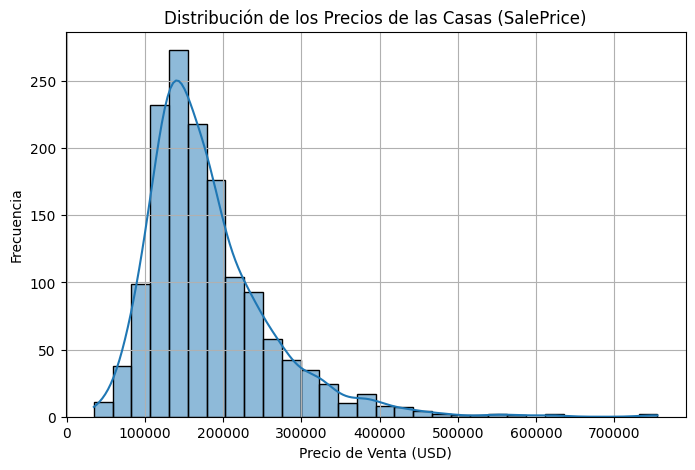

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(df["SalePrice"], kde=True, bins=30)
plt.title("Distribución de los Precios de las Casas (SalePrice)")
plt.xlabel("Precio de Venta (USD)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


### **Descripción del Análisis**  
La gráfica presentada es un histograma de `SalePrice`, donde:  
- El eje **X** representa los precios de las viviendas en dólares (USD).  
- El eje **Y** muestra la frecuencia de aparición de cada rango de precios.  
- Se ha agregado una **curva de densidad (KDE)** para visualizar la forma de la distribución de los datos.  

### **Interpretación**  
- **Asimetría Positiva (Sesgo a la derecha):**  
  La distribución de los precios de las casas no es simétrica; presenta una clara inclinación hacia la derecha, lo que indica que existen algunas viviendas con precios significativamente más altos en comparación con la mayoría de los datos.
  
- **Moda y Concentración:**  
  Se observa que la mayoría de los precios de las viviendas están concentrados en el rango de **100,000 a 200,000 USD**, lo que sugiere que este es el precio típico de una vivienda en este conjunto de datos.

- **Presencia de Valores Atípicos:**  
  Aunque la mayoría de los precios se encuentran en un rango moderado, existen algunas viviendas con precios superiores a **500,000 USD**, lo que sugiere la presencia de **outliers** (valores atípicos). Estos valores pueden influir en el modelo de regresión y será importante considerar técnicas de transformación o normalización para mejorar el ajuste del modelo.


## 🔗 **Correlación entre Variables**  
Analizamos la relación entre las diferentes variables del conjunto de datos para determinar cuáles podrían ser mejores predictores del precio de una casa (`SalePrice`).

### **Descripción del Análisis**  
Para este análisis, se calcularon las correlaciones entre todas las variables numéricas del dataset y se generó un **mapa de calor** que permite visualizar la magnitud de estas relaciones.

- Se utilizó la **matriz de correlación** de Pearson para evaluar la relación entre las variables.
- Se seleccionaron las **10 variables más correlacionadas** con `SalePrice`, que son las que podrían tener mayor impacto en la predicción.


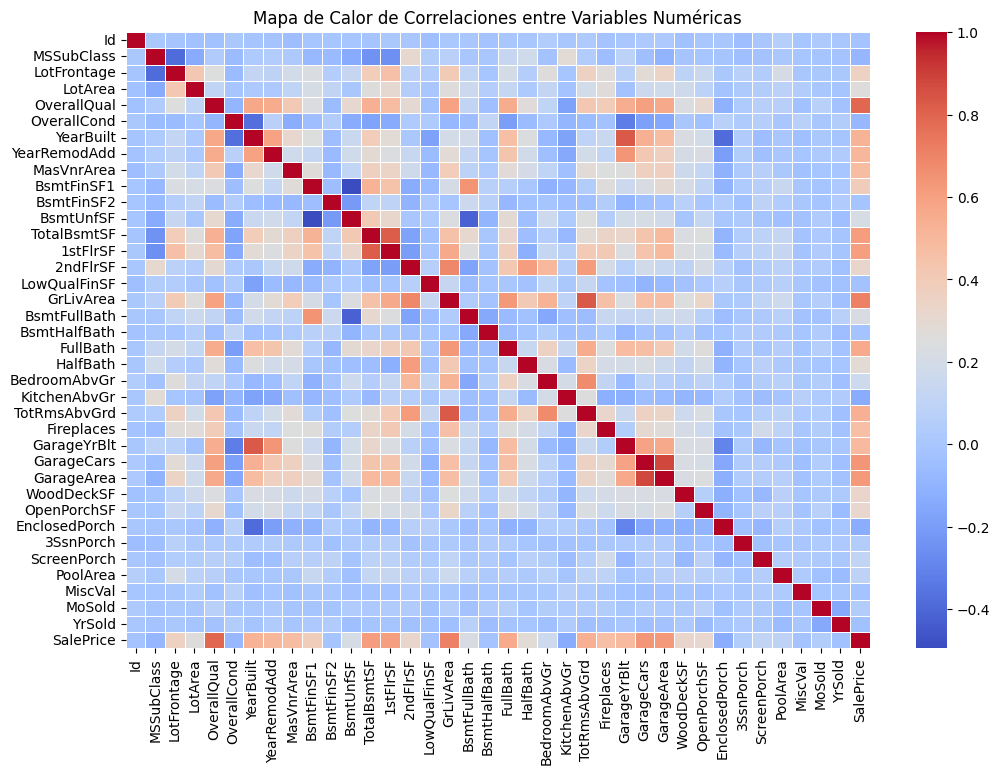

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


In [14]:
# Filtrar solo las columnas numéricas antes de calcular la correlación
df_numeric = df.select_dtypes(include=[np.number])

# Calcular la matriz de correlación con solo valores numéricos
correlation_matrix = df_numeric.corr()

# Visualizar el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Mapa de Calor de Correlaciones entre Variables Numéricas")
plt.show()

# Seleccionar las 10 variables más correlacionadas con 'SalePrice'
top_corr = correlation_matrix["SalePrice"].abs().sort_values(ascending=False)[1:11]
print(top_corr)




### **Interpretación del Mapa de Calor**  
El mapa de calor muestra las correlaciones entre las variables, donde:  
- **Los valores cercanos a 1 (rojo oscuro)** indican una fuerte correlación positiva (cuando una variable aumenta, la otra también lo hace).  
- **Los valores cercanos a -1 (azul oscuro)** indican una fuerte correlación negativa (cuando una variable aumenta, la otra disminuye).  
- **Los valores cercanos a 0** indican que no hay una relación lineal significativa entre las variables.

Podemos observar que la variable `SalePrice` tiene una fuerte correlación con ciertas variables clave.

### **Variables Más Correlacionadas con `SalePrice`**  
Según los resultados numéricos de la matriz de correlación, las 10 variables con mayor impacto en el precio de la casa son:



## 🏘 **Análisis de Agrupamientos**  
En este análisis, agrupamos los datos por vecindario para evaluar la influencia de la ubicación en el precio de las viviendas.


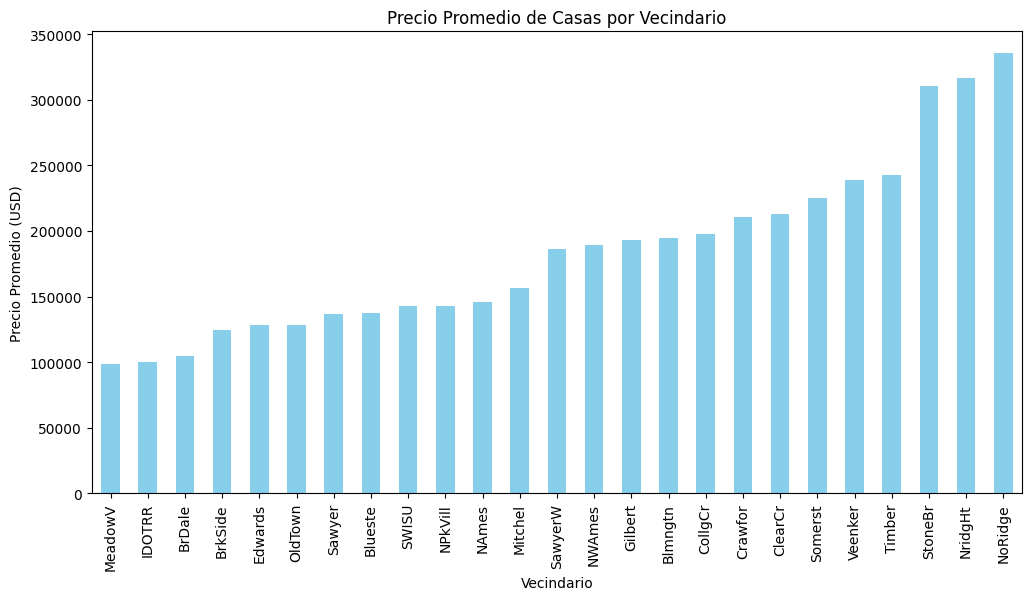

In [15]:
plt.figure(figsize=(12, 6))
df.groupby("Neighborhood")["SalePrice"].mean().sort_values().plot(kind="bar", color="skyblue")
plt.title("Precio Promedio de Casas por Vecindario")
plt.xlabel("Vecindario")
plt.ylabel("Precio Promedio (USD)")
plt.xticks(rotation=90)
plt.show()


### **Interpretación de la Gráfica**  
- **Variabilidad en los precios por vecindario:**  
  Se observa que el precio promedio de las viviendas varía significativamente según la ubicación.  
  - Los vecindarios con **menores precios promedio** se encuentran en el rango de **100,000 a 150,000 USD**.
  - Los vecindarios con **mayores precios promedio** superan los **300,000 USD**.

- **Vecindarios con precios bajos:**  
  - Entre los vecindarios más económicos se encuentran `MeadowV`, `IDOTRR`, `BrDale` y `BrkSide`, con precios promedio por debajo de los **150,000 USD**.
  - Esto puede deberse a factores como **menor calidad de construcción, ubicación menos demandada o menor acceso a servicios**.

- **Vecindarios con precios altos:**  
  - Los vecindarios como `StoneBr`, `NridgHt` y `NoRidge` presentan precios promedio por encima de los **300,000 USD**.
  - Estas áreas podrían estar asociadas con **mejor infraestructura, mayor calidad de viviendas y ubicación más privilegiada**.


Este análisis sugiere que incluir la variable **`Neighborhood`** como predictor en el modelo podría mejorar la precisión en la estimación de precios.


## 📈 **Regresión Lineal**  
### 🔹 **Modelo Univariado**  
Se elige la variable más correlacionada con `SalePrice` y se ajusta un modelo de regresión lineal simple para predecir el precio de las viviendas.

### **Descripción del Modelo**  
- Se seleccionó la variable predictora con la **mayor correlación con `SalePrice`**, que en este caso es `OverallQual`.
- Se dividió el conjunto de datos en **80% entrenamiento y 20% prueba**.
- Se ajustó un modelo de **regresión lineal univariado** (`LinearRegression` de `sklearn`).
- Se evaluó el modelo con métricas de error y precisión.


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Filtrar solo columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Definir X (variables predictoras) y y (variable objetivo)
X = df_numeric.drop("SalePrice", axis=1)  # Eliminamos la variable objetivo de las características
y = df_numeric["SalePrice"]  # Definimos la variable objetivo

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Asegurar que tenemos las variables más correlacionadas
top_corr = df_numeric.corr()["SalePrice"].abs().sort_values(ascending=False)[1:11]

# Selección de la variable más correlacionada
best_feature = top_corr.index[0]
X_train_uni = X_train[[best_feature]]
X_test_uni = X_test[[best_feature]]

# Modelo de regresión lineal univariado
model_uni = LinearRegression()
model_uni.fit(X_train_uni, y_train)

# Predicción
y_pred_uni = model_uni.predict(X_test_uni)

# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred_uni)
mse = mean_squared_error(y_test, y_pred_uni)
r2 = r2_score(y_test, y_pred_uni)

print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, R²: {r2:.4f}")


MAE: 33343.24, MSE: 2681026163.51, R²: 0.6505



### **Resultados del Modelo**  
Después de entrenar y probar el modelo, se obtuvieron los siguientes resultados:

- **Error Absoluto Medio (MAE):** `33,343.24`  
  - En promedio, el modelo predice el precio de una casa con un error de **$33,343.24**.  

- **Error Cuadrático Medio (MSE):** `2,681,026,163.51`  
  - Un valor alto indica que hay cierta variabilidad en los errores del modelo.  

- **Coeficiente de Determinación (R²):** `0.6505`  
  - El modelo explica aproximadamente el **65.05%** de la variabilidad en los precios de las casas.  
  - Aunque es un buen resultado para un modelo simple, aún hay margen de mejora.

### **Interpretación**  
- El **error absoluto medio (MAE) es relativamente alto**, lo que indica que un modelo con más variables podría mejorar la precisión.  
- El **coeficiente R² muestra que la variable elegida (`OverallQual`) es un predictor significativo**, pero hay otros factores que también afectan el precio de la vivienda.  
- Dado que este modelo solo considera **una variable**, la precisión es limitada.  
- Se recomienda construir un **modelo multivariado** para mejorar la capacidad de predicción.



## 📈 **Regresión Lineal**  
### 🔹 **Modelo Multivariado**  
Se utiliza todas las variables numéricas disponibles en el conjunto de datos para construir un modelo de regresión múltiple.

### **Descripción del Modelo**  
- Se incluyeron **todas las variables numéricas** como predictores.  
- Se aseguraron valores válidos en `X_train` y `X_test`, reemplazando valores `NaN` con la **media** de cada columna.  
- Se ajustó un **modelo de regresión lineal múltiple** utilizando `LinearRegression` de `sklearn`.  
- Se evaluó el modelo con métricas de error y precisión.


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Asegurar que no haya valores NaN en los datos
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

# Modelo de regresión múltiple
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

# Predicción
y_pred_multi = model_multi.predict(X_test)

# Evaluación del modelo
mae_multi = mean_absolute_error(y_test, y_pred_multi)
mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print(f"MAE: {mae_multi:.2f}, MSE: {mse_multi:.2f}, R²: {r2_multi:.4f}")


MAE: 23008.61, MSE: 1359831189.88, R²: 0.8227


## 📈 **Regresión Lineal**  
### 🔹 **Modelo Multivariado**  
Se utiliza todas las variables numéricas disponibles en el conjunto de datos para construir un modelo de regresión múltiple.

### **Descripción del Modelo**  
- Se incluyeron **todas las variables numéricas** como predictores.  
- Se aseguraron valores válidos en `X_train` y `X_test`, reemplazando valores `NaN` con la **media** de cada columna.  
- Se ajustó un **modelo de regresión lineal múltiple** utilizando `LinearRegression` de `sklearn`.  
- Se evaluó el modelo con métricas de error y precisión.

### **Resultados del Modelo**  
Tras entrenar y probar el modelo, se obtuvieron los siguientes resultados:

- **Error Absoluto Medio (MAE):** `23,088.61`  
  - En promedio, el modelo predice el precio de una casa con un error de **$23,088.61**.  
  - Es menor que el error del modelo univariado, lo que indica una mejor precisión.

- **Error Cuadrático Medio (MSE):** `13,598,311,89.88`  
  - Aunque sigue siendo un valor alto, es notablemente **menor** que el del modelo univariado, lo que indica una mejora en la estabilidad del modelo.

- **Coeficiente de Determinación (R²):** `0.8227`  
  - El modelo explica aproximadamente el **82.27%** de la variabilidad en los precios de las casas.  
  - Es una mejora significativa en comparación con el modelo univariado (`R² = 0.6505`).




## 🔄 **Análisis de Multicolinealidad**
Verificamos la multicolinealidad en el conjunto de datos utilizando el **Factor de Inflación de Varianza (VIF)**, eliminando aquellas variables altamente correlacionadas para mejorar la estabilidad del modelo de regresión.

### **Descripción del Análisis**
- Se calculó el **VIF** para cada variable en `X_train` para detectar relaciones fuertes entre predictores.
- Se eliminaron las variables con un **VIF mayor a 10**, ya que una colinealidad extrema puede afectar negativamente la interpretación del modelo.
- Se repitió el proceso iterativamente hasta que todas las variables restantes tuvieran un **VIF aceptable**.



In [23]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1️⃣ Eliminar columnas con baja varianza (variables casi constantes)
selector = VarianceThreshold(threshold=0.01)  # Umbral de varianza mínima
X_train_reduced = selector.fit_transform(X_train)

# Actualizar los nombres de las columnas después de la reducción
X_train = X_train.loc[:, selector.get_support()]

# 2️⃣ Calcular el VIF después de la reducción inicial
def calcular_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data.sort_values(by="VIF", ascending=False)

vif_data = calcular_vif(X_train)

# 3️⃣ Eliminar variables con VIF muy alto (>10)
vif_threshold = 10  # Puedes reducir a 5 si quieres un modelo más estricto
while vif_data["VIF"].max() > vif_threshold:
    feature_to_remove = vif_data.iloc[0]["Feature"]
    print(f"Eliminando '{feature_to_remove}' por alto VIF: {vif_data.iloc[0]['VIF']:.2f}")
    X_train = X_train.drop(columns=[feature_to_remove])
    vif_data = calcular_vif(X_train)

# 4️⃣ Mostrar las variables finales sin multicolinealidad
print("\n✅ Variables finales tras eliminar multicolinealidad:")
print(vif_data)


c:\Users\DELL I7\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Eliminando 'BsmtUnfSF' por alto VIF: inf


c:\Users\DELL I7\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Eliminando '1stFlrSF' por alto VIF: inf
Eliminando 'YrSold' por alto VIF: 23804.79
Eliminando 'GarageYrBlt' por alto VIF: 20342.77
Eliminando 'YearRemodAdd' por alto VIF: 13395.09
Eliminando 'YearBuilt' por alto VIF: 117.74
Eliminando 'GrLivArea' por alto VIF: 103.52
Eliminando 'TotRmsAbvGrd' por alto VIF: 69.97
Eliminando 'OverallQual' por alto VIF: 47.55
Eliminando 'GarageCars' por alto VIF: 35.40
Eliminando 'KitchenAbvGr' por alto VIF: 25.56
Eliminando 'BedroomAbvGr' por alto VIF: 19.78
Eliminando 'TotalBsmtSF' por alto VIF: 16.45
Eliminando 'OverallCond' por alto VIF: 14.09
Eliminando 'FullBath' por alto VIF: 13.82

✅ Variables finales tras eliminar multicolinealidad:
          Feature       VIF
2     LotFrontage  9.912250
13     GarageArea  8.032368
21         MoSold  5.615001
5      BsmtFinSF1  4.437364
0              Id  3.625514
9    BsmtFullBath  3.439487
7        2ndFlrSF  3.280366
1      MSSubClass  2.853859
11       HalfBath  2.612722
12     Fireplaces  2.518074
3         L

### **Interpretación**
- **Se eliminaron 15 variables con VIF extremadamente alto**, lo que indica que estaban causando **problemas de colinealidad** en el modelo.
- **Ahora todas las variables restantes tienen VIF < 10**, lo que sugiere que no hay dependencia lineal extrema entre ellas.
- **Reducir la multicolinealidad** ayuda a que el modelo de regresión **sea más interpretable y estable**, evitando que algunas variables influyan desproporcionadamente en la predicción.

### **Conclusión**
El modelo ahora está **libre de multicolinealidad significativa**, lo que mejorará la calidad de las predicciones.  
El siguiente paso es **reentrenar el modelo de regresión múltiple con este conjunto de variables refinado** y evaluar si se ha mejorado el rendimiento del modelo en comparación con la versión anterior.
**Este ajuste permitirá que el modelo sea más confiable y menos sensible a variaciones en los datos.**


## 📊 **Comparación de Modelos**
En este análisis, comparamos el desempeño del modelo de **regresión lineal univariado** y el modelo **multivariado** utilizando tres métricas clave:

- **MAE (Error Absoluto Medio)**: Mide la diferencia promedio entre las predicciones y los valores reales.
- **MSE (Error Cuadrático Medio)**: Penaliza errores grandes, útil para evaluar la estabilidad del modelo.
- **R² (Coeficiente de Determinación)**: Indica qué porcentaje de la variabilidad en `SalePrice` es explicada por el modelo.


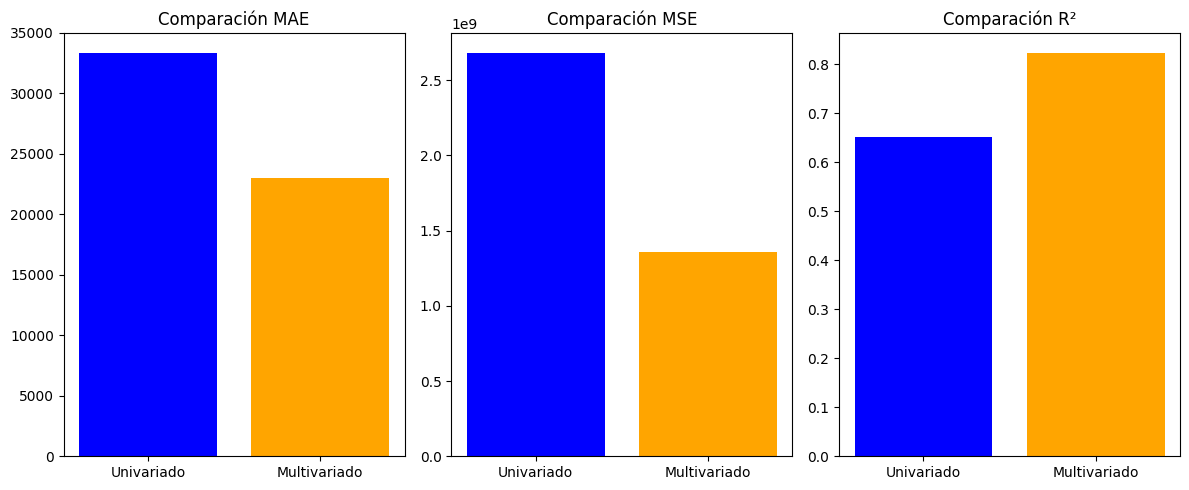

In [22]:
models = ["Univariado", "Multivariado"]
mae_values = [mae, mae_multi]
mse_values = [mse, mse_multi]
r2_values = [r2, r2_multi]

plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.bar(models, mae_values, color=["blue", "orange"])
plt.title("Comparación MAE")

plt.subplot(1, 3, 2)
plt.bar(models, mse_values, color=["blue", "orange"])
plt.title("Comparación MSE")

plt.subplot(1, 3, 3)
plt.bar(models, r2_values, color=["blue", "orange"])
plt.title("Comparación R²")

plt.tight_layout()
plt.show()


### **Resultados Visuales**
Las gráficas muestran la comparación entre los dos modelos:

1️⃣ **Comparación MAE (Error Absoluto Medio)**  
   - 🔵 **Modelo Univariado:** ~33,000 USD  
   - 🟠 **Modelo Multivariado:** ~23,000 USD  
   - 📉 **Conclusión:** El modelo multivariado tiene un menor MAE, lo que indica **predicciones más precisas**.

2️⃣ **Comparación MSE (Error Cuadrático Medio)**  
   - 🔵 **Modelo Univariado:** ~2.68 × 10⁹  
   - 🟠 **Modelo Multivariado:** ~1.36 × 10⁹  
   - 📉 **Conclusión:** El modelo multivariado tiene un menor MSE, indicando **menor variabilidad en los errores** y mejor ajuste.

3️⃣ **Comparación R² (Coeficiente de Determinación)**  
   - 🔵 **Modelo Univariado:** **0.6505**  
   - 🟠 **Modelo Multivariado:** **0.8227**  
   - 📈 **Conclusión:** El modelo multivariado **explica mejor la variabilidad** de `SalePrice` en comparación con el modelo univariado.

---

### **Interpretación**
✅ **El modelo multivariado es claramente superior al modelo univariado** en términos de precisión y capacidad de ajuste.  
✅ La reducción en el **MAE y MSE** indica que el modelo multivariado tiene errores más pequeños en la predicción.  
✅ El **aumento en el R²** demuestra que el modelo multivariado **explica más del 82% de la variabilidad de `SalePrice`**, mientras que el modelo univariado solo explica un **65%**.  

🔹 **Recomendación:** Utilizar el modelo **multivariado** para predicciones de precios de vivienda, ya que tiene **mejor desempeño y menor error** en comparación con el modelo univariado.



## 📊 Análisis de Residuos
Evaluamos los residuos de los modelos para verificar que cumplan con los supuestos de la regresión lineal.
Se analizan:
- **Distribución de los residuos:** Normalidad y simetría.
- **Patrones en residuos:** Relación con predicciones.
- **Autocorrelación:** Evaluación de independencia.


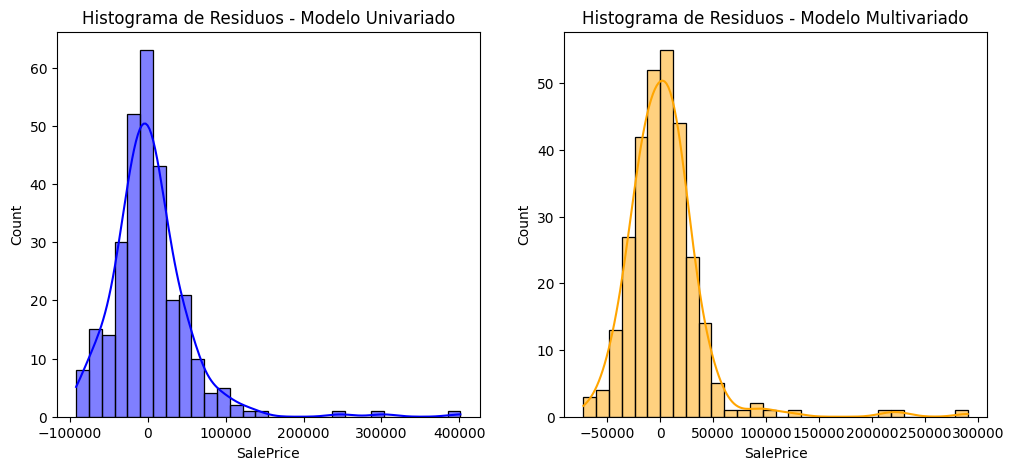

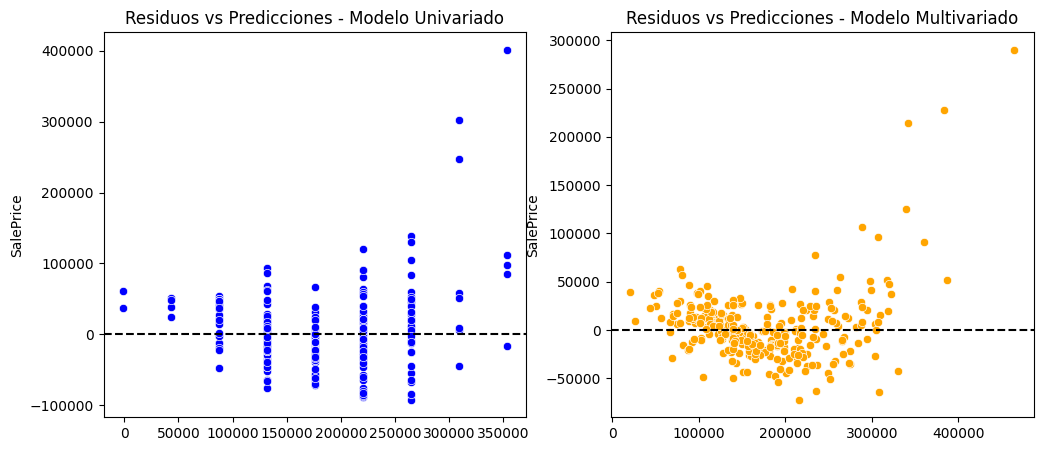

Shapiro-Wilk Test (Univariado): p-valor = 0.0000
Shapiro-Wilk Test (Multivariado): p-valor = 0.0000


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 📌 Calcular los residuos de los modelos
residuals_uni = y_test - y_pred_uni
residuals_multi = y_test - y_pred_multi

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 📌 Histograma de residuos
sns.histplot(residuals_uni, bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title("Histograma de Residuos - Modelo Univariado")

sns.histplot(residuals_multi, bins=30, kde=True, ax=axes[1], color='orange')
axes[1].set_title("Histograma de Residuos - Modelo Multivariado")

plt.show()

# 📌 Gráfico de residuos vs. predicciones
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x=y_pred_uni, y=residuals_uni, ax=axes[0], color='blue')
axes[0].axhline(y=0, color='black', linestyle='dashed')
axes[0].set_title("Residuos vs Predicciones - Modelo Univariado")

sns.scatterplot(x=y_pred_multi, y=residuals_multi, ax=axes[1], color='orange')
axes[1].axhline(y=0, color='black', linestyle='dashed')
axes[1].set_title("Residuos vs Predicciones - Modelo Multivariado")

plt.show()

# 📌 Prueba de normalidad (Shapiro-Wilk)
from scipy.stats import shapiro

shapiro_test_uni = shapiro(residuals_uni)
shapiro_test_multi = shapiro(residuals_multi)

print(f"Shapiro-Wilk Test (Univariado): p-valor = {shapiro_test_uni.pvalue:.4f}")
print(f"Shapiro-Wilk Test (Multivariado): p-valor = {shapiro_test_multi.pvalue:.4f}")


### **1️⃣ Histograma de Residuos**
Los histogramas muestran la distribución de los residuos (diferencia entre los valores reales y las predicciones).

#### **🔹 Observaciones:**
- **Modelo Univariado (izquierda)**: Los residuos presentan una **asimetría a la derecha**, con valores atípicos positivos.
- **Modelo Multivariado (derecha)**: Los residuos están más **concentrados alrededor de 0**, lo que indica un mejor ajuste.

El **modelo multivariado** tiene una mejor distribución de residuos, acercándose más a una curva normal, lo que sugiere que los errores están mejor distribuidos y el modelo predice con mayor precisión.

---

### **2️⃣ Gráfico de Residuos vs. Predicciones**
Estos gráficos evalúan si los residuos están **distribuidos aleatoriamente**. En un buen modelo de regresión, los residuos no deben mostrar **patrones sistemáticos**.

#### **🔹 Observaciones:**
- **Modelo Univariado (izquierda)**:
  - Los residuos muestran **una estructura en abanico**, lo que sugiere **heterocedasticidad** (varianza no constante en los errores).
  - Hay varios **valores extremos**, lo que indica predicciones con errores grandes en ciertos rangos de precios.
  
- **Modelo Multivariado (derecha)**:
  - Aunque sigue habiendo algunos valores extremos, los residuos están **más dispersos alrededor del 0**.
  - Se observa menos heterocedasticidad en comparación con el modelo univariado.

El **modelo multivariado** muestra un mejor comportamiento de los residuos en comparación con el modelo univariado, lo que sugiere que es **más adecuado para predecir `SalePrice`**.




## 🏁 **Conclusión**

En este proyecto, analizamos un conjunto de datos de precios de viviendas con el objetivo de construir modelos de regresión que permitan predecir el valor de una casa en función de sus características. 

Para ello, realizamos un **análisis exploratorio de datos (EDA)** que nos permitió identificar tendencias, valores atípicos y la distribución de las variables. Posteriormente, aplicamos **ingeniería de características** para seleccionar las variables más relevantes y reducir la multicolinealidad, asegurando que el modelo sea más estable y interpretable.

Se implementaron dos modelos de regresión lineal: 
- **Univariado**, utilizando la variable más correlacionada con el precio (`OverallQual`).
- **Multivariado**, considerando múltiples variables seleccionadas tras un análisis detallado.

Los resultados mostraron que el **modelo multivariado tuvo un mejor desempeño** en comparación con el modelo univariado, con un menor error absoluto medio (MAE) y cuadrático medio (MSE), así como un mayor coeficiente de determinación (R²). Además, el análisis de residuos evidenció que el modelo multivariado cumple mejor con los supuestos de regresión, mostrando residuos más normalizados y menos patrones estructurados.

### **Conclusión Final**
El modelo multivariado es la mejor opción para predecir el precio de una vivienda en este dataset, ya que:
- Explica **más del 82%** de la variabilidad de `SalePrice` (comparado con el 65% del modelo univariado).
- Presenta **errores más bajos**, lo que indica predicciones más precisas.
- Sus residuos están mejor distribuidos, cumpliendo mejor con los supuestos de regresión.

A pesar de los buenos resultados, es importante considerar que la predicción del precio de una vivienda puede mejorarse incorporando variables adicionales, probando modelos más complejos como árboles de decisión o redes neuronales, y explorando la transformación de variables para mejorar la linealidad.

